![Control panel at Three Mile Island generating station](controlroomTMI.jpg "The Control Panel")

## Basic plotting: bar charts and histograms with altair, matplotlib, and plotnine

ipython has "magic" commands, %pwd, %cd, which are intended to make life easier for humans, like showing our directory and letting us change directory.

In [1]:
# Let us first handle the preliminary imports
import pandas as pd
import altair as alt
import plotnine as p9

Note: you can import all of the functions
defined in a module with 
    from pandas import *
This means less typing (good for interactive programming)
but also obscures which code comes from which library.

In [2]:
rainfall = pd.read_csv("../data/cities.csv",delimiter="\t")

In [3]:
head(rainfall)

NameError: name 'head' is not defined

Sorry about that, `.head()` is a method that belongs to pandas data frames, not a function in the global namespace. I have to call `df.head()`

In [4]:
rainfall.head()

,Days,"City, State",Inches,Milimeters
0,113,"Atlanta, GA",49.7,1263
1,88,"Austin, TX",34.2,870
2,116,"Baltimore, MD",41.9,1064
3,117,"Birmingham, AL",53.7,1364
4,126,"Boston, MA",43.8,1112


In [5]:
rainfall.shape

(17, 4)

In [6]:
# Let's just quick check what data types this has:
print(rainfall["Days"].dtype)
print(rainfall["City, State"].dtype)
print(rainfall["Inches"].dtype)
print(rainfall["Milimeters"].dtype)

int64
object
float64
int64


In [7]:
rainfall.dtypes

Days             int64
City, State     object
Inches         float64
Milimeters       int64
dtype: object

In [8]:
# I can add a new column that is easier to type:
rainfall["City"] = rainfall["City, State"]
rainfall

,Days,"City, State",Inches,Milimeters,City
0,113,"Atlanta, GA",49.7,1263,"Atlanta, GA"
1,88,"Austin, TX",34.2,870,"Austin, TX"
2,116,"Baltimore, MD",41.9,1064,"Baltimore, MD"
3,117,"Birmingham, AL",53.7,1364,"Birmingham, AL"
4,126,"Boston, MA",43.8,1112,"Boston, MA"
5,167,"Buffalo, NY",40.5,1028,"Buffalo, NY"
6,110,"Charlotte, NC",41.6,1057,"Charlotte, NC"
7,124,"Chicago, IL",36.9,937,"Chicago, IL"
8,137,"Cincinnati, OH",41.9,1065,"Cincinnati, OH"
9,155,"Cleveland, OH",39.1,994,"Cleveland, OH"


In [9]:
rainfall.City

0          Atlanta, GA 
1           Austin, TX 
2        Baltimore, MD 
3       Birmingham, AL 
4           Boston, MA 
5          Buffalo, NY 
6         Charlotte, NC
7           Chicago, IL
8       Cincinnati, OH 
9        Cleveland, OH 
10        Columbus, OH 
11          Dallas, TX 
12           Denver, CO
13         Detroit, MI 
14        Hartford, CT 
15         Houston, TX 
16    Indianapolis, IN 
Name: City, dtype: object

In [10]:
rainfall.City.values

array(['Atlanta, GA ', 'Austin, TX ', 'Baltimore, MD ', 'Birmingham, AL ',
       'Boston, MA ', 'Buffalo, NY ', 'Charlotte, NC', 'Chicago, IL',
       'Cincinnati, OH ', 'Cleveland, OH ', 'Columbus, OH ',
       'Dallas, TX ', 'Denver, CO', 'Detroit, MI ', 'Hartford, CT ',
       'Houston, TX ', 'Indianapolis, IN '], dtype=object)

In [11]:
# basic, altair-defaults bar chart:
alt.Chart(rainfall).mark_bar().encode(
    alt.X("City"), 
    alt.Y("Milimeters"))

alt.Chart(...)

In [12]:
# basic, altair-defaults bar chart:
alt.Chart(rainfall).mark_bar(
).encode(
    alt.X("City:N"), 
    alt.Y("Milimeters:Q"))

alt.Chart(...)

In [13]:
# basic, altair-defaults dot chart:
alt.Chart(rainfall).mark_point(
).encode(alt.X("City:N"), 
         alt.Y("Milimeters:Q"))

alt.Chart(...)

In [14]:
# basic, altair-defaults line chart:
alt.Chart(rainfall).mark_line(
).encode(alt.X("City:N"), 
         alt.Y("Milimeters:Q"))

alt.Chart(...)

In [15]:
# We can put the city names in y, where they are easier to read:
alt.Chart(rainfall).mark_bar().encode(
    alt.Y("City:N"), 
    alt.X("Milimeters:Q"))

alt.Chart(...)

In [16]:
# Can I sort my data?  
alt.Chart(rainfall.sort_values("Milimeters")).mark_bar().encode(
    alt.Y("City:N"), 
    alt.X("Milimeters:Q", sort="ascending"))

alt.Chart(...)

In [17]:
# Well, what I want is Y (City) sorted by values in 
# X (Milimeters)... 
alt.Chart(rainfall).mark_bar().encode(
    alt.Y("City:N", sort=alt.Sort(field="Milimeters")), 
    alt.X("Milimeters:Q", sort="ascending"))

alt.Chart(...)

Note, the syntax here (the precise magical incantation to cause the sorting) is *not* at all obvious.  We have to look this up in the altair documentation: 
https://altair-viz.github.io/user_guide/generated/channels/altair.X.html

We can reverse the order by making the "sort" argument to alt.Y a more complex alt.Sort object instead of just a field name:

In [18]:
alt.Chart(rainfall).mark_bar(
).encode(
    alt.Y("City:N", sort=alt.Sort(field="Milimeters", 
                                  order="descending")), 
    alt.X("Milimeters:Q"))

alt.Chart(...)

Search-engine "altair font size"... https://stackoverflow.com/questions/53401693/how-do-you-set-axis-fontsize-in-altair ... postpend this

    .configure_axis(
    labelFontSize=20,
    titleFontSize=20
    )
    
And `Chart` takes a title option... 

In [ ]:
alt.Chart(rainfall, title=["Some rainfall", "in some places"]).mark_bar(
).encode(
    alt.Y("City:N", sort=alt.Sort(field="Milimeters", 
                                  order="descending")), 
    alt.X("Milimeters:Q"))    .configure_axis(
    labelFontSize=20,
    titleFontSize=20
    )

The title font size is now a bit small.. 
https://stackoverflow.com/questions/54855337/increase-font-size-of-chart-title-in-altair?rq=3

    .configure_title(fontSize=24)

In [ ]:
alt.Chart(rainfall, title=["Some rainfall", "in some places"]).mark_bar(
).encode(
    alt.Y("City:N", sort=alt.Sort(field="Milimeters", 
                                  order="descending")), 
    alt.X("Milimeters:Q"))    .configure_axis(
    labelFontSize=20,
    titleFontSize=20
    )    .configure_title(fontSize=24)

In [20]:
alt.Chart(
    rainfall, title=["Some rainfall", "in some places"]
     ).mark_bar().encode(  
    alt.Y("City:N", 
          sort=alt.Sort(
        field="Milimeters", order="descending")
         ),  alt.X("Milimeters:Q")
        )    .configure_axis(   
    labelFontSize=20,titleFontSize=20    
)    .configure_title(fontSize=24)

alt.Chart(...)

In [22]:
alt.Chart( rainfall, title=["Some rainfall", "in some places"] ).mark_bar().encode(  alt.Y("City:N", sort=alt.Sort(        field="Milimeters", order="descending")),  alt.X("Milimeters:Q") 
 )   .configure_axis(       labelFontSize=20,titleFontSize=20    )    .configure_title(fontSize=24)

alt.Chart(...)

In [27]:
alt.Chart( rainfall, title=["Some rainfall", "in some places"] )\
.mark_bar().encode(  alt.Y("City:N", sort=alt.Sort(      \
field="Milimeters", order="descending")),  alt.X("Milimeters:Q") )  \
.configure_axis(       labelFontSize=20,titleFontSize=20   \
                    )    .configure_title(fontSize=24)

alt.Chart(...)

In [ ]:
# change the font

https://stackoverflow.com/questions/73338942/how-to-install-a-new-font-in-altair-and-specifying-it-in-alt-titleparams
 
    title=alt.TitleParams(
        text='Example Chart',
        fontSize=24,
        fontStyle='italic',
        font='Times'
    )

In [28]:
alt.Chart(rainfall, title=alt.TitleParams(
        text='Some rainfall',
        fontSize=24,
        font='Times'
    )).mark_bar(
).encode(
    alt.Y("City:N", sort=alt.Sort(field="Milimeters", 
                                  order="descending")), 
    alt.X("Milimeters:Q"))    .configure_axis(
    labelFontSize=20,
    titleFontSize=20
    )    .configure_title(fontSize=24)

alt.Chart(...)

In [29]:
#  Aaand we can get serif fonts on the axes if we 
# add arguments to configure_axis too.
alt.Chart(rainfall, title=alt.TitleParams(
        text='Some rainfall',
        fontSize=24,
        font='Times'
    )).mark_bar(
).encode(
    alt.Y("City:N", sort=alt.Sort(field="Milimeters", 
                                  order="descending")), 
    alt.X("Milimeters:Q"))    .configure_axis(
    labelFontSize=20,
    labelFont='Times',
    titleFontSize=20,
    titleFont='Times'
    )    .configure_title(fontSize=24)

alt.Chart(...)

That was altair.   

Now what do we remember about the matplotlib API...
we can generate plots three ways:
* data.plot()
* plt.plot(data)
* fig,ax = plt.subplot()  
* *  ax.plot(data)

In [30]:
import matplotlib.pyplot as plt

(matplotlib.figure.Figure, matplotlib.axes._axes.Axes)

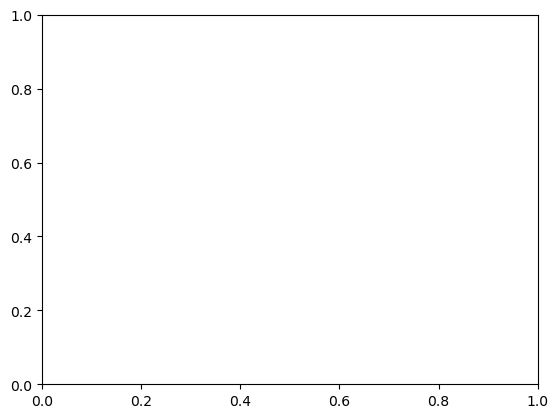

In [31]:
fig, ax = plt.subplots()
(type(fig), type(ax))

In [ ]:
# Two different ways to set the max and min of x axis:
plt.xlim([1920 , 2040])
ax.set_xlim([1920 , 2040])

<BarContainer object of 17 artists>

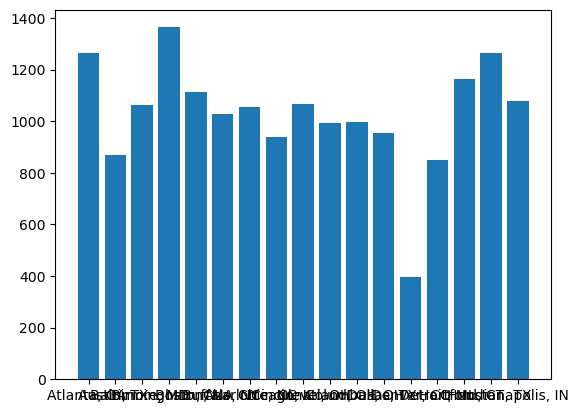

In [32]:
plt.bar(rainfall["City"], rainfall["Milimeters"])

In [ ]:
# This is not acceptable.  Perhaps the documentation will help?
plt.bar?

1

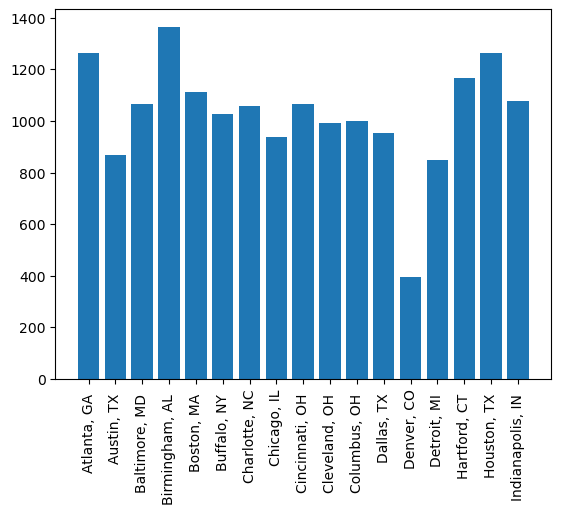

In [35]:
# This doesn't help.  But a quick search reveals the solution:
plt.bar(rainfall["City"], rainfall["Milimeters"])
plt.xticks(rotation=90)
1
# I was able to use this only because xticks() is exposed in the plt interface.

1

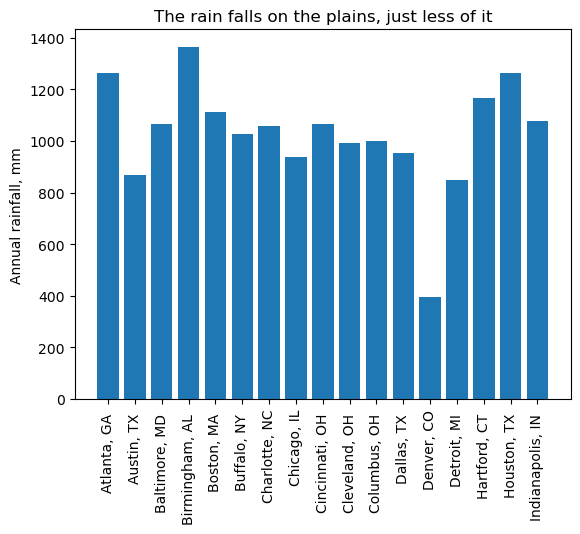

In [36]:
plt.bar(rainfall["City"], rainfall["Milimeters"])
plt.xticks(rotation=90)
plt.ylabel("Annual rainfall, mm")
plt.title("The rain falls on the plains, just less of it")
1

In [37]:
print(len(rainfall))
rainfall.head()

17


,Days,"City, State",Inches,Milimeters,City
0,113,"Atlanta, GA",49.7,1263,"Atlanta, GA"
1,88,"Austin, TX",34.2,870,"Austin, TX"
2,116,"Baltimore, MD",41.9,1064,"Baltimore, MD"
3,117,"Birmingham, AL",53.7,1364,"Birmingham, AL"
4,126,"Boston, MA",43.8,1112,"Boston, MA"


In [38]:
# matplotlib wants me to sort my data first
rainfallsorted =rainfall.sort_values(by = "Milimeters")
rainfallsorted

,Days,"City, State",Inches,Milimeters,City
12,87,"Denver, CO",15.6,396,"Denver, CO"
13,135,"Detroit, MI",33.5,850,"Detroit, MI"
1,88,"Austin, TX",34.2,870,"Austin, TX"
7,124,"Chicago, IL",36.9,937,"Chicago, IL"
11,81,"Dallas, TX",37.6,954,"Dallas, TX"
9,155,"Cleveland, OH",39.1,994,"Cleveland, OH"
10,139,"Columbus, OH",39.3,998,"Columbus, OH"
5,167,"Buffalo, NY",40.5,1028,"Buffalo, NY"
6,110,"Charlotte, NC",41.6,1057,"Charlotte, NC"
2,116,"Baltimore, MD",41.9,1064,"Baltimore, MD"


1

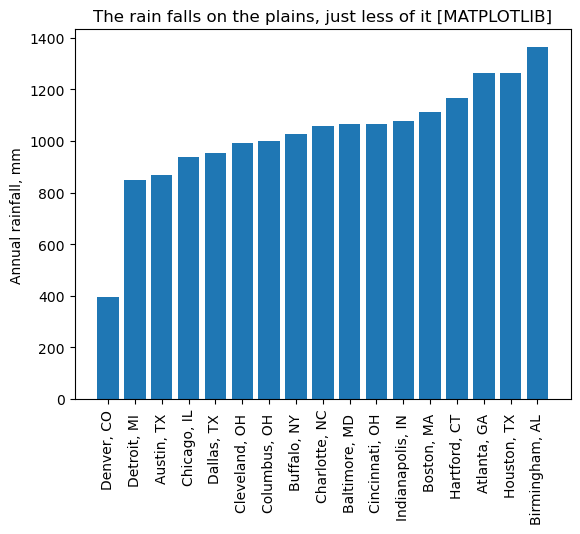

In [39]:
plt.bar(rainfallsorted["City"], rainfallsorted["Milimeters"])
plt.xticks(rotation=90)
plt.ylabel("Annual rainfall, mm")
plt.title("The rain falls on the plains, just less of it [MATPLOTLIB]")
1

1

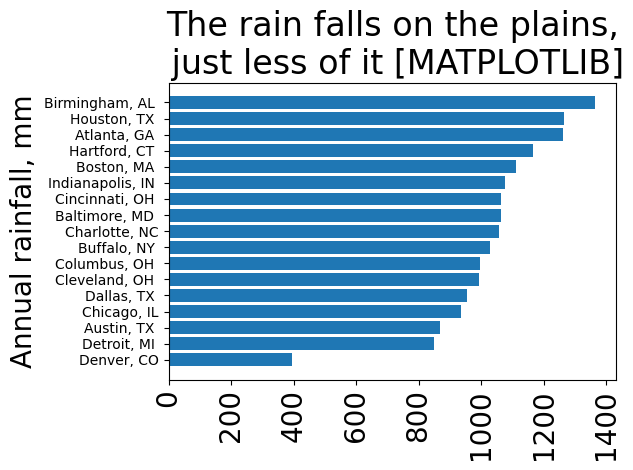

In [41]:
# But this is chopping off the labels..
# The following incantation causes an automatic
# adjustment of the margins in light of the size of the text:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

plt.barh(rainfallsorted["City"], rainfallsorted["Milimeters"])
plt.xticks(rotation=90, fontsize=20)
plt.ylabel("Annual rainfall, mm", fontsize=20)
plt.title("The rain falls on the plains,\n just less of it [MATPLOTLIB]", fontsize=24)
1

1

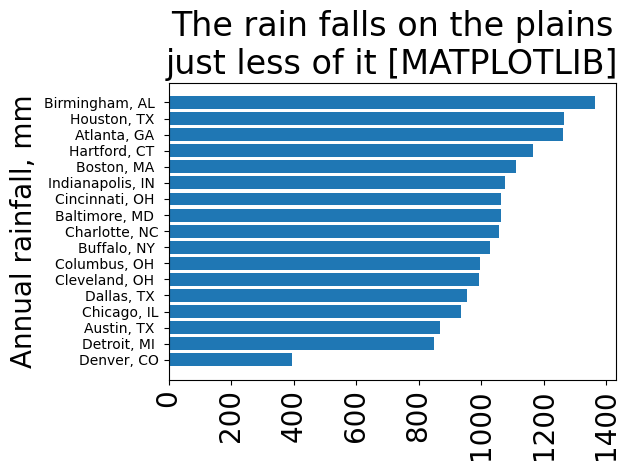

In [42]:
# I can do the same horizontally:
# plt.barh(y_axis,x_axis)
plt.barh(rainfallsorted["City"], rainfallsorted["Milimeters"])
plt.xticks(rotation=90, fontsize=20)
plt.ylabel("Annual rainfall, mm", fontsize=20)
plt.title("The rain falls on the plains\njust less of it [MATPLOTLIB]", 
         fontsize=24)
1

In [ ]:
import plotnine as p9

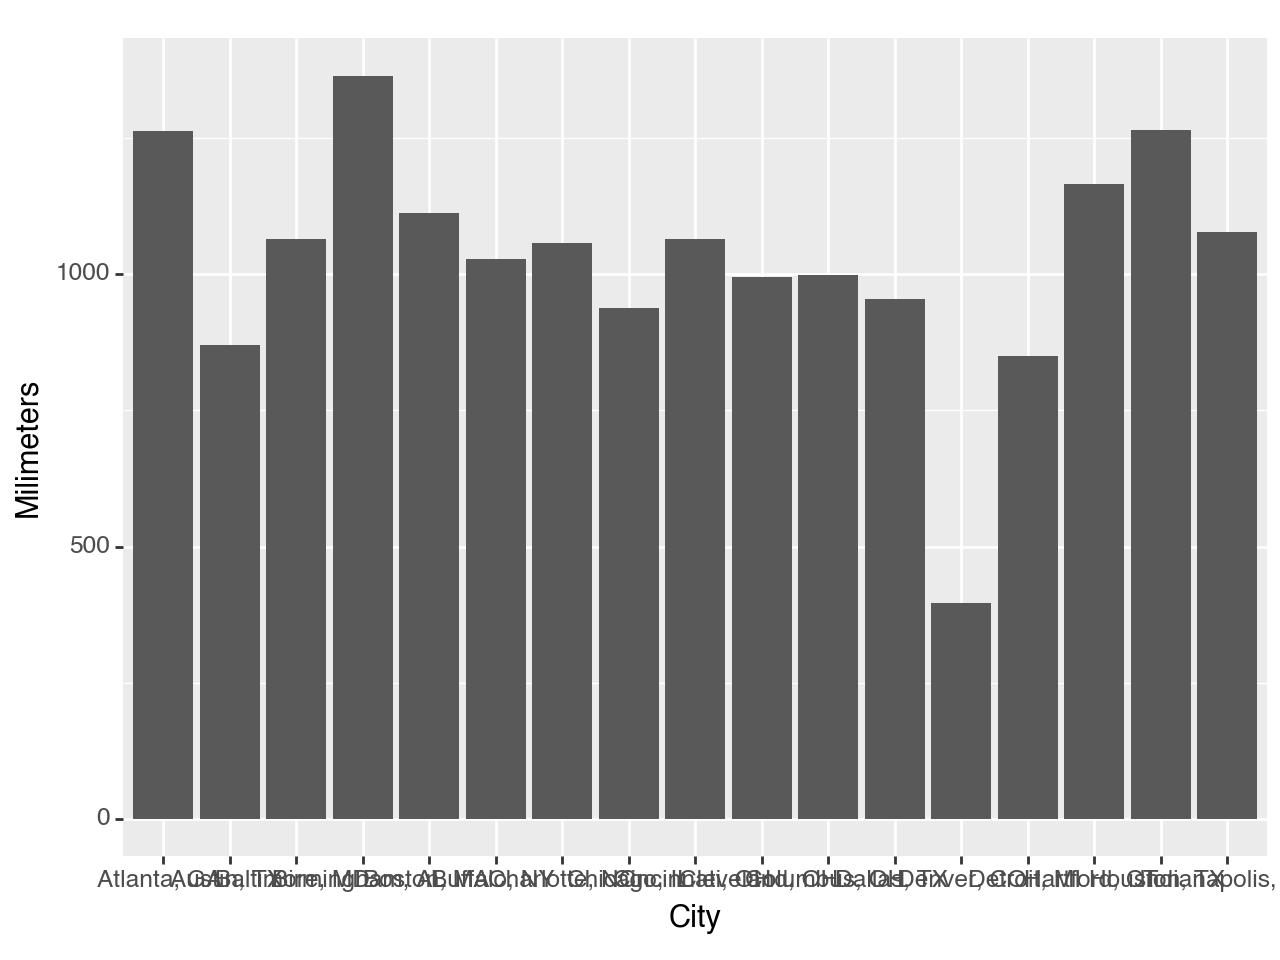

<Figure Size: (640 x 480)>

In [44]:
#  p9.ggplot(data=surveys_complete, mapping=p9.aes(x='factor(year)')) + p9.geom_bar()    

p9.ggplot(
    data=rainfall, 
    mapping=p9.aes(x="City", y="Milimeters")
     ) + p9.geom_bar(stat="identity")

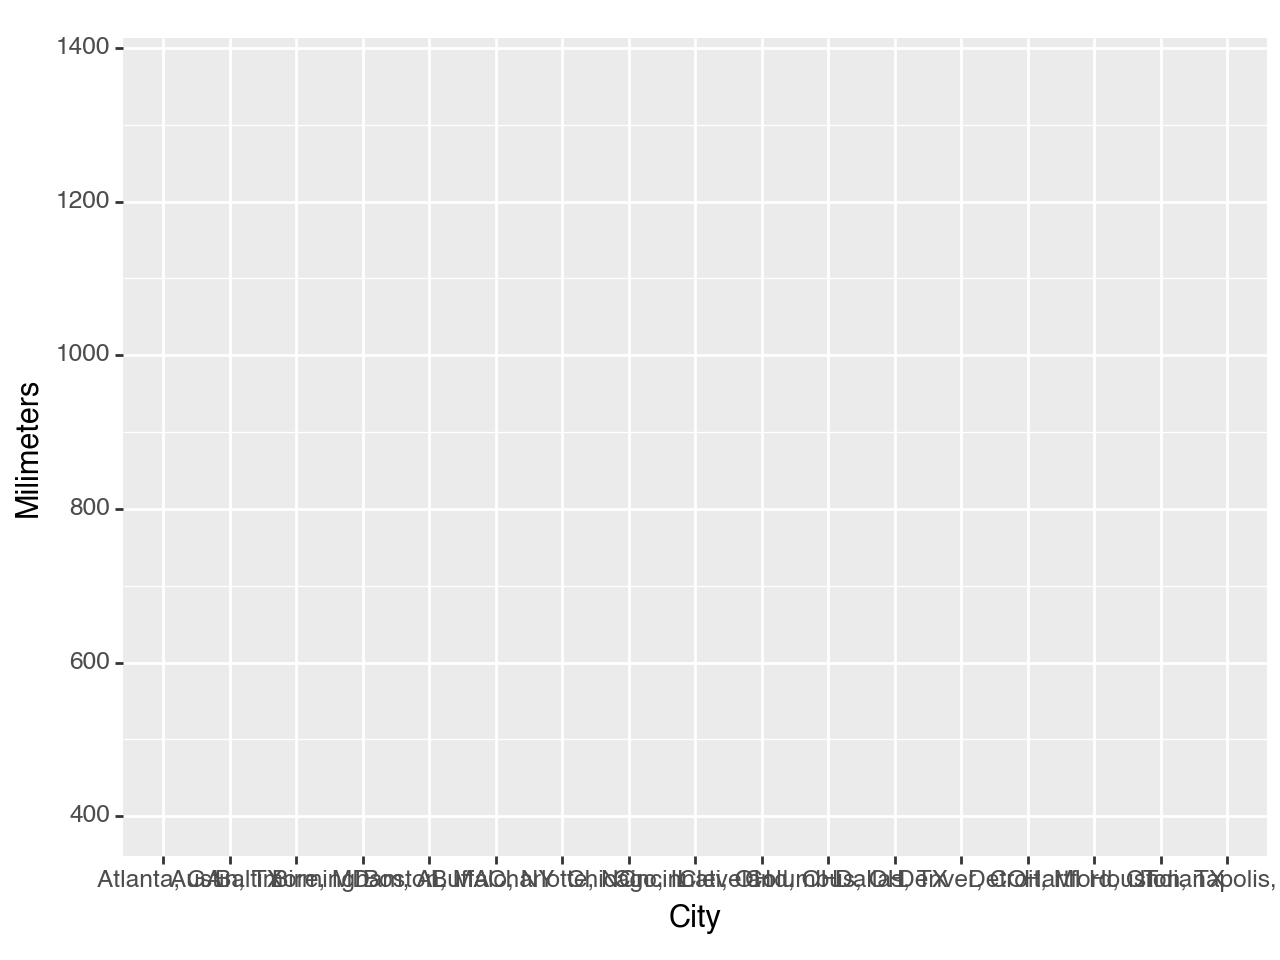

<Figure Size: (640 x 480)>

In [43]:
p9.ggplot(
    data=rainfall, 
    mapping=p9.aes(x="City", y="Milimeters")
     )

Search engine interlude.  "plotnine rotate x axis labels"
https://stackoverflow.com/questions/47714540/plotnine-rotating-labels
suggests adding 

   + p9.theme(axis_text_x=element_text(rotation=90, hjust=1))
   
to the figure:

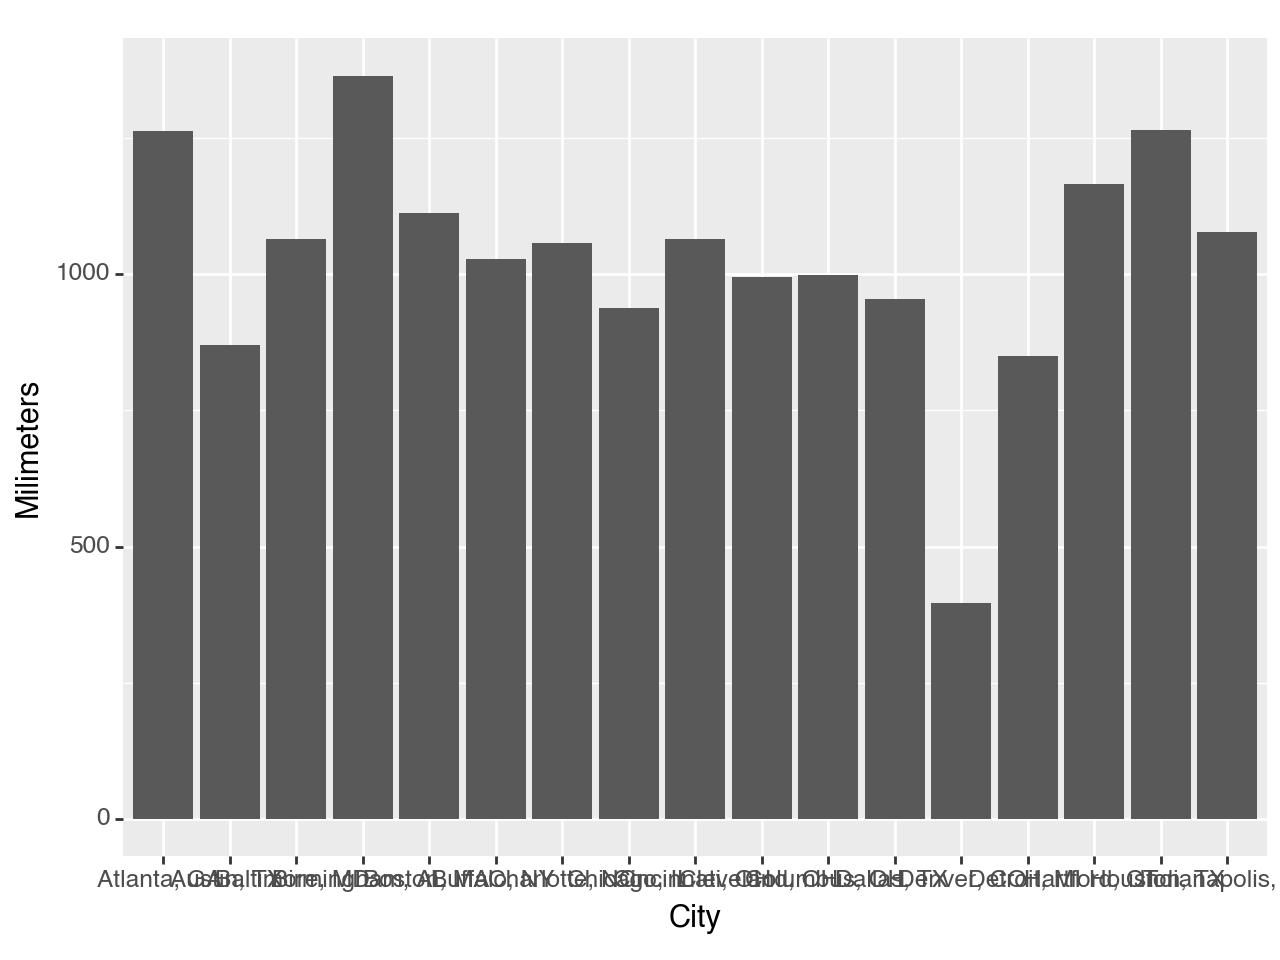

<Figure Size: (640 x 480)>

In [47]:
p9.ggplot(data=rainfall, mapping=p9.aes(x="City", y="Milimeters")) + p9.geom_bar(stat="identity") 

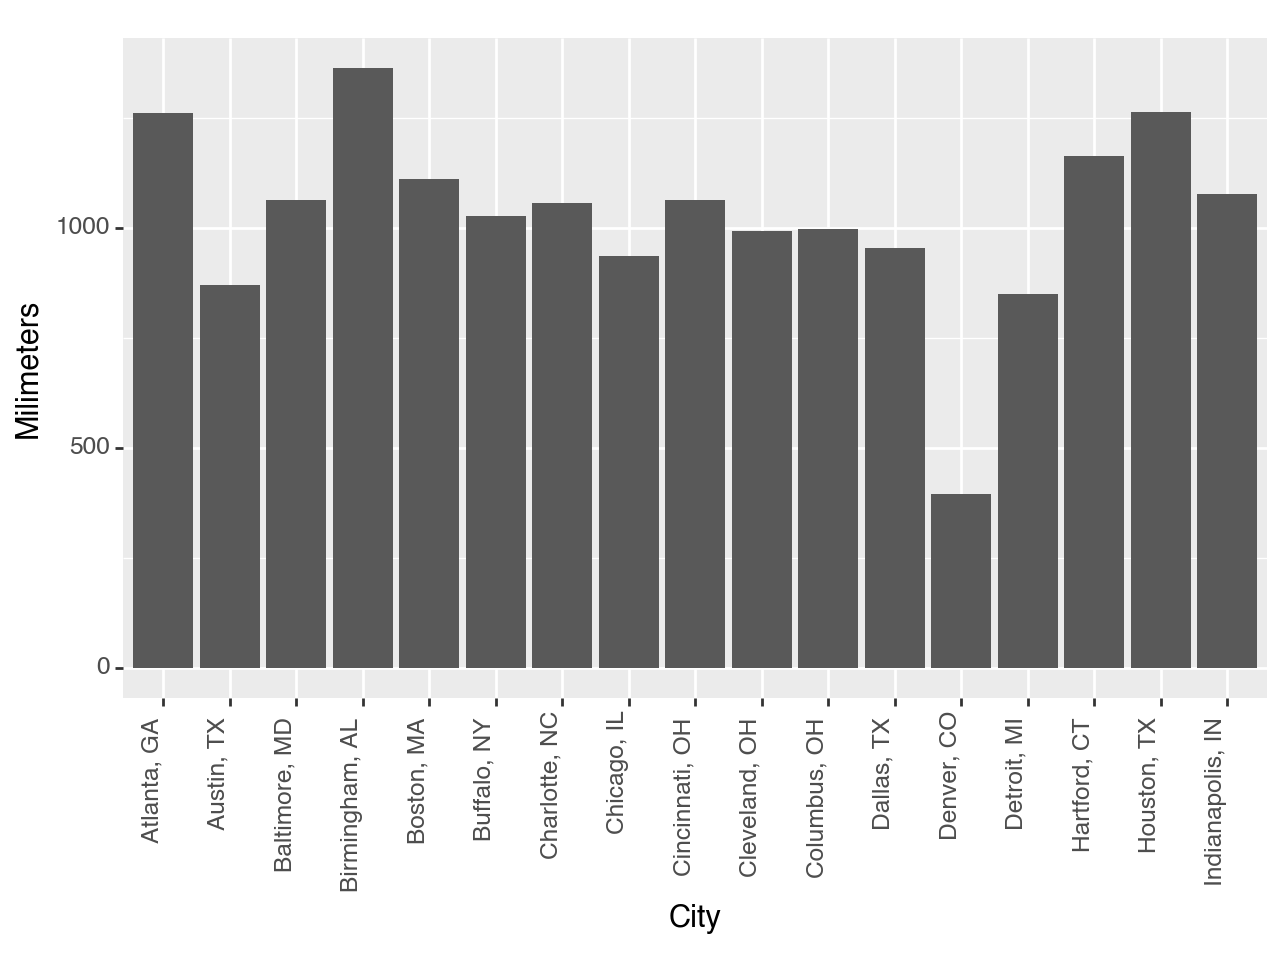

<Figure Size: (640 x 480)>

In [48]:
from plotnine import  element_text
p9.ggplot(
    data=rainfall, 
    mapping=p9.aes(x="City", y="Milimeters")
     ) + p9.geom_bar(
    stat="identity") + p9.theme(
    axis_text_x=element_text(rotation=90, hjust=1))

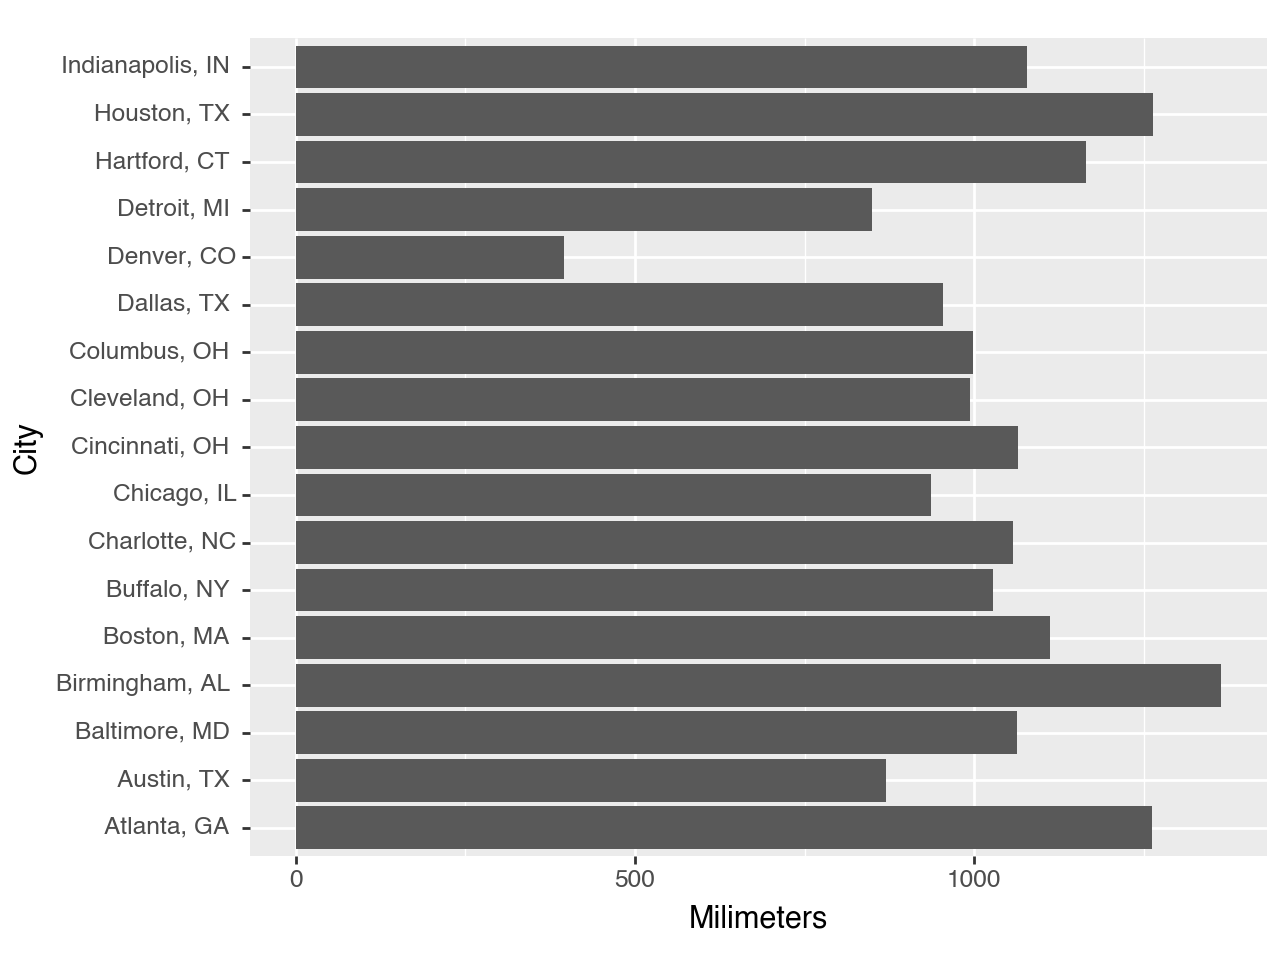

<Figure Size: (640 x 480)>

In [49]:
# swap x and y
p9.ggplot(data=rainfall, 
          mapping=p9.aes(x="City", y="Milimeters")
         ) + p9.geom_bar(stat="identity")+  p9.coord_flip()

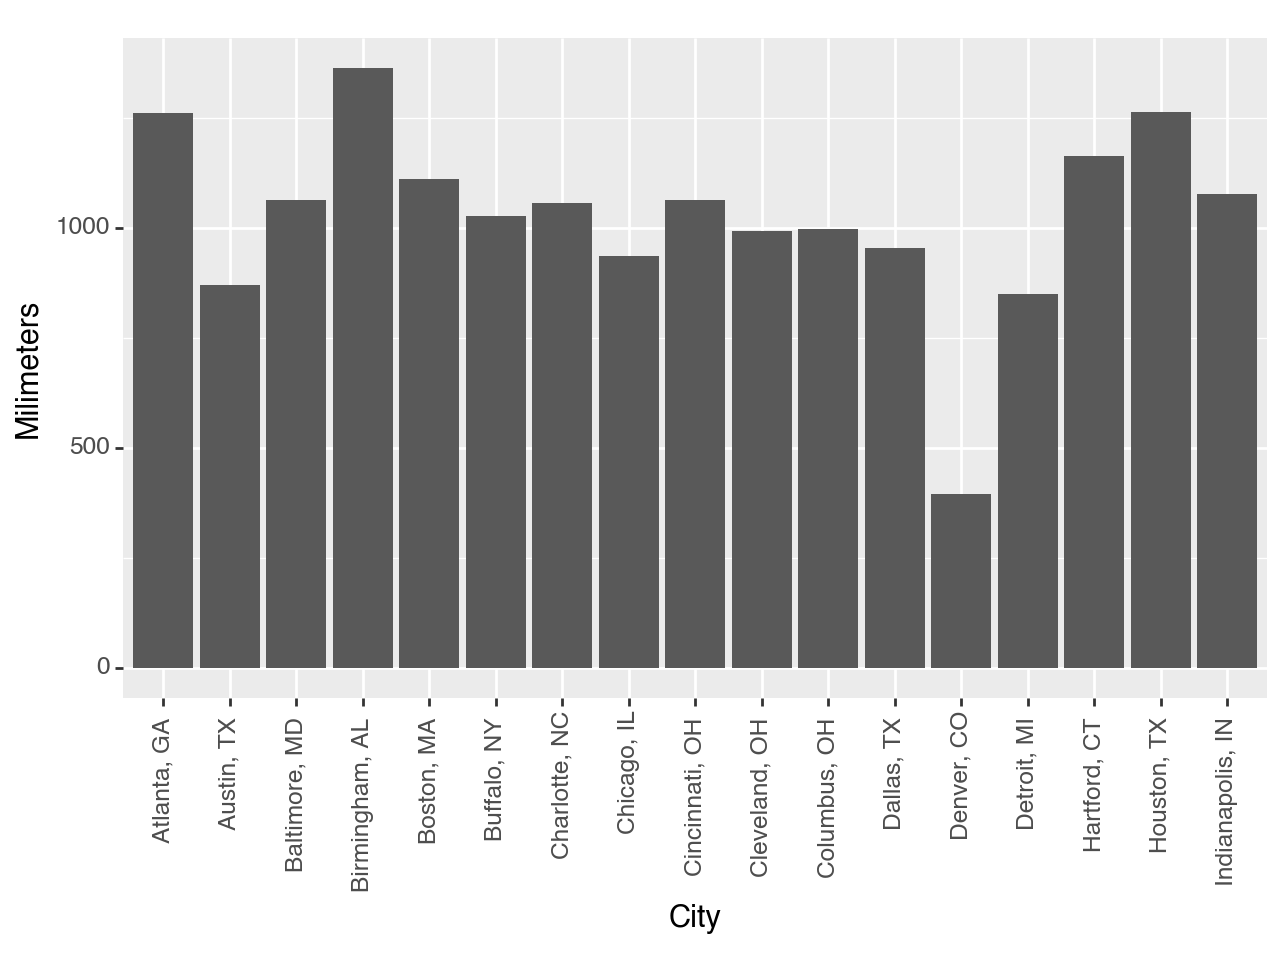

<Figure Size: (640 x 480)>

In [50]:
p9.ggplot(data=rainfallsorted, 
          mapping=p9.aes(x="City", y="Milimeters")
         ) + p9.geom_bar(stat="identity") + p9.theme(axis_text_x = p9.element_text(angle = 90))

In [ ]:
# The element_text will take "size" as an option, so
# we can try to boost our font size.

# And to generate a title we "add" p9.ggtitle()


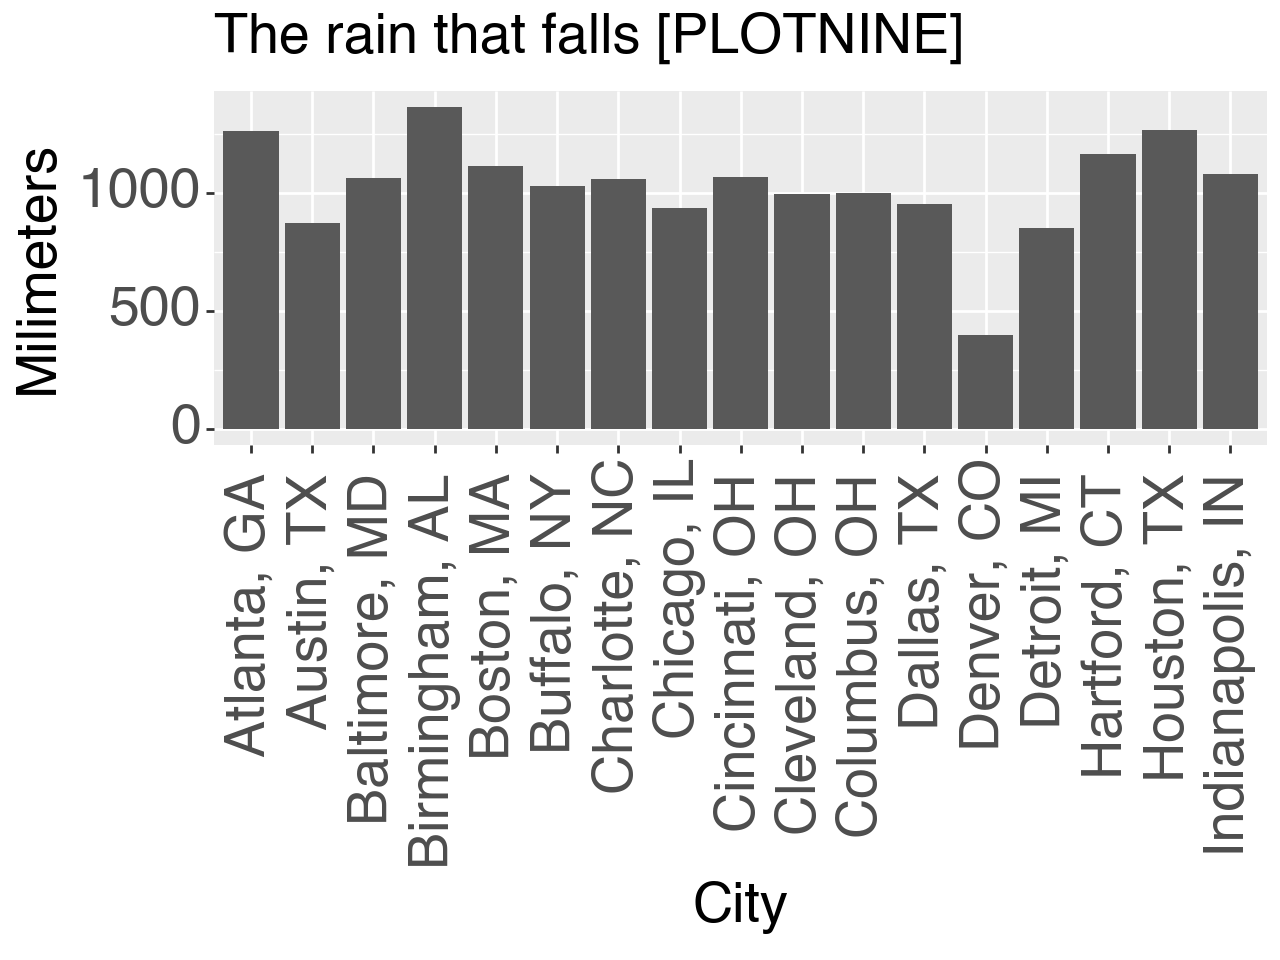

<Figure Size: (640 x 480)>

In [51]:
from plotnine import theme
p9.ggplot(data=rainfallsorted, 
          mapping=p9.aes(x="City", y="Milimeters")) + \
          p9.geom_bar(stat="identity") + \
          p9.theme(axis_text_x = p9.element_text(angle = 90)) + \
          theme(text = element_text(size=20)) + \
          p9.ggtitle("The rain that falls [PLOTNINE]")

In [ ]:
# Seaborn is just a pretty wrapper for matplotlib:

In [52]:
import seaborn as sns

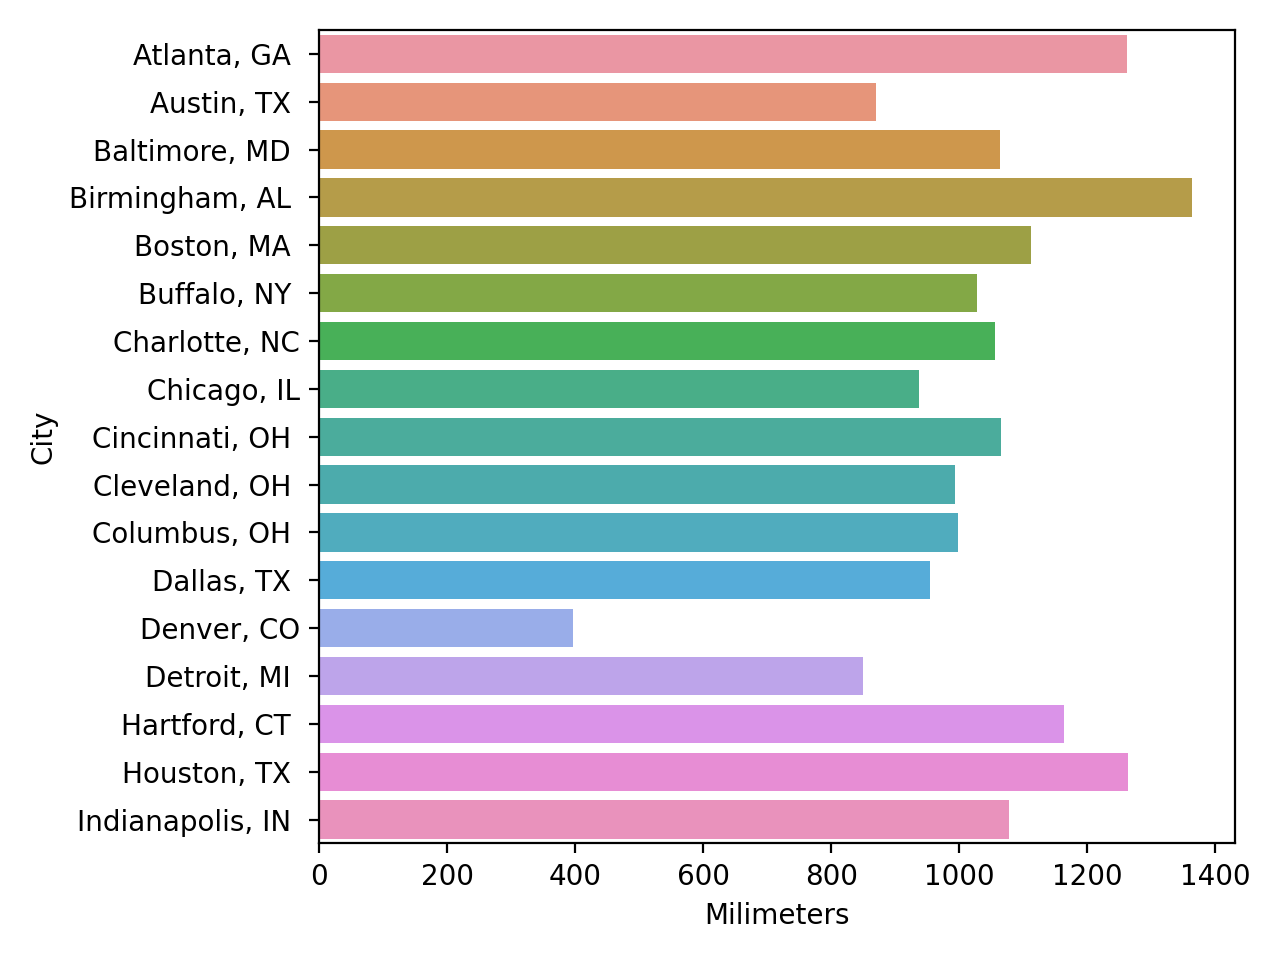

In [53]:
ax = sns.barplot(x="Milimeters", y="City", data=rainfall)

Oh, my.  Well.  Surely there is a knob somewhere that changes the color scheme?

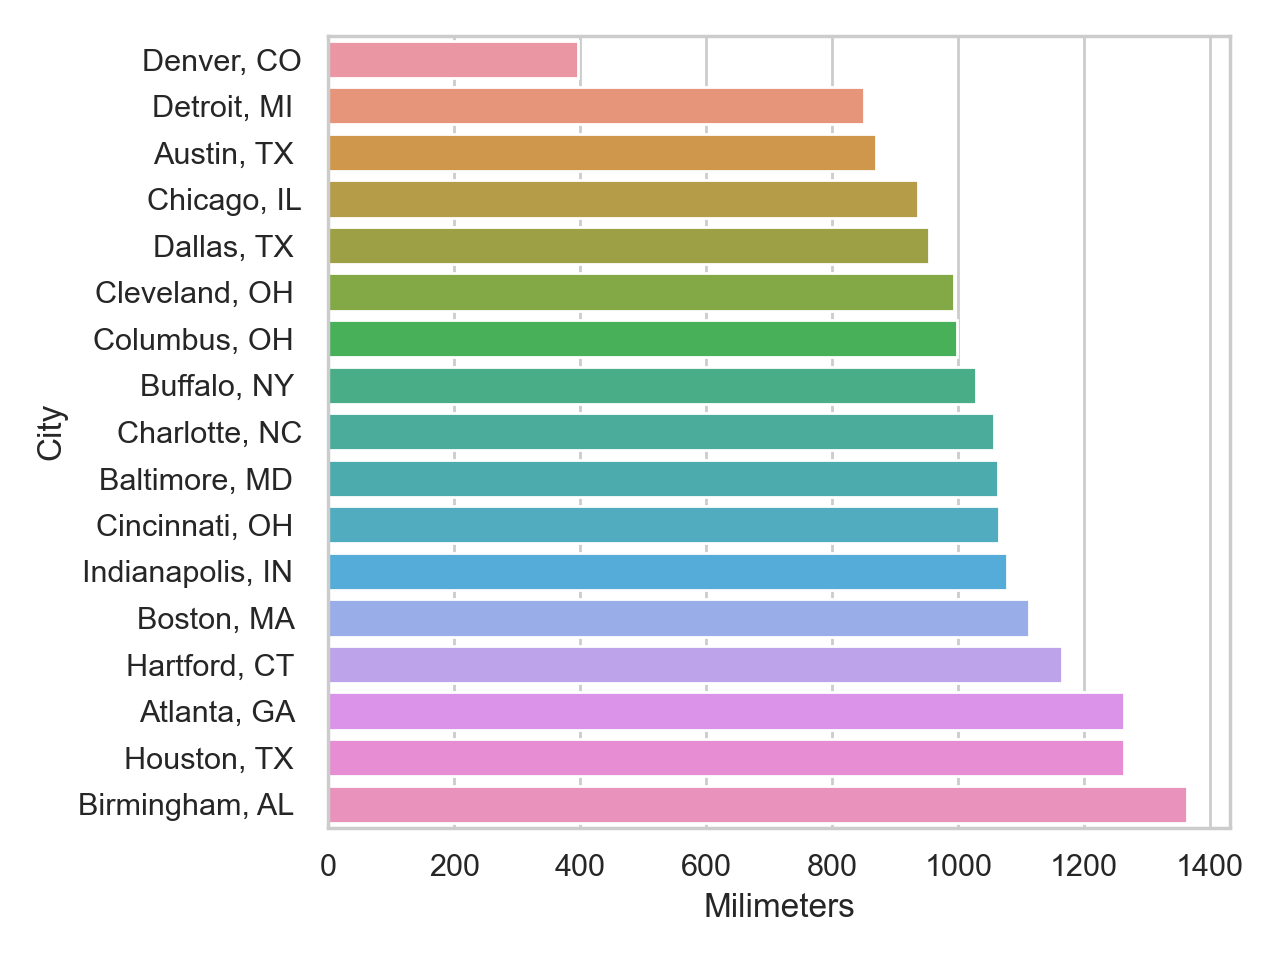

In [54]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Milimeters", y="City", data=rainfallsorted)

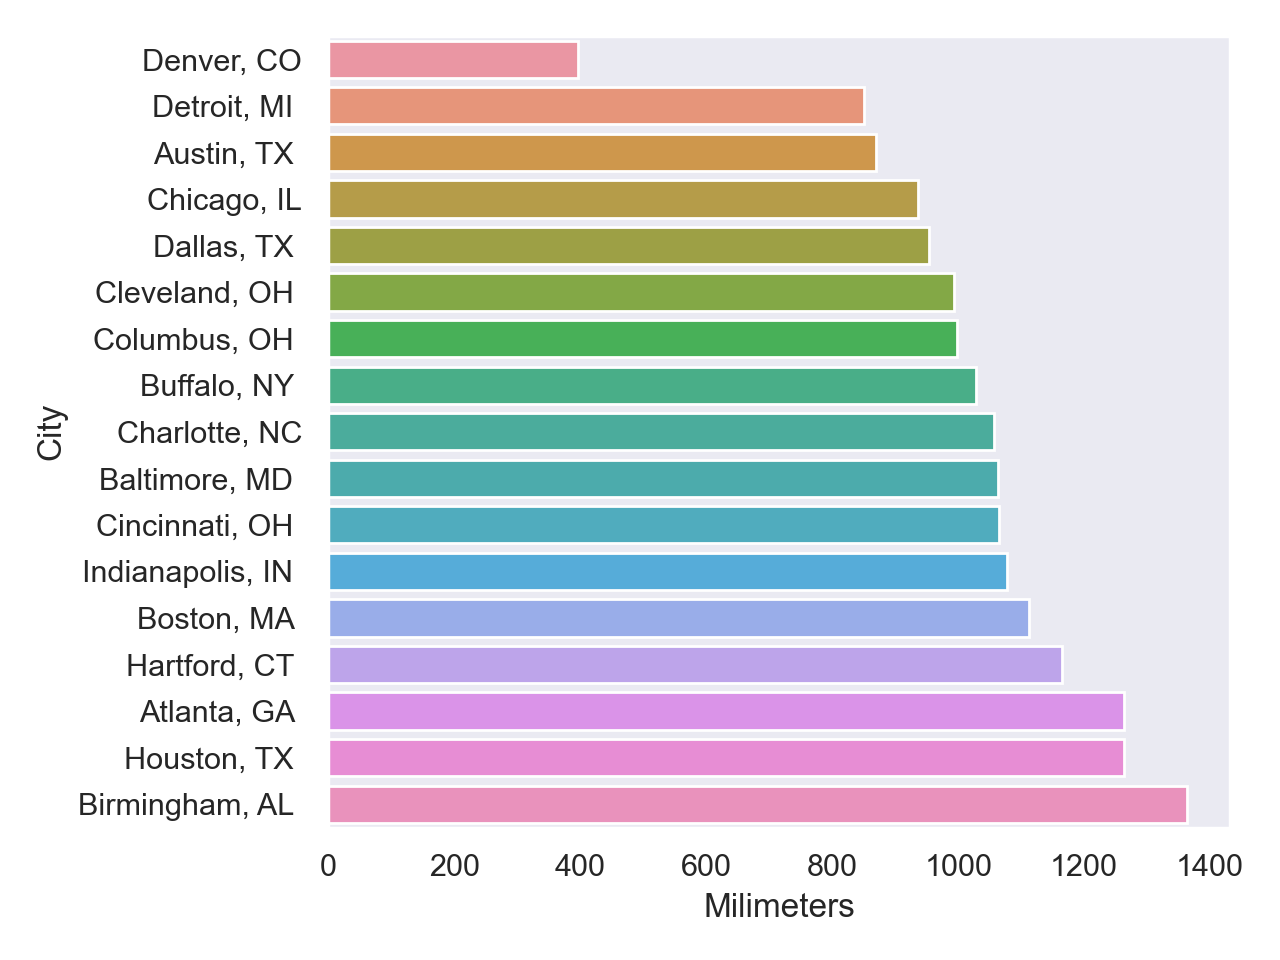

In [55]:
sns.set_style("dark")
ax = sns.barplot(x="Milimeters", y="City", data=rainfallsorted)

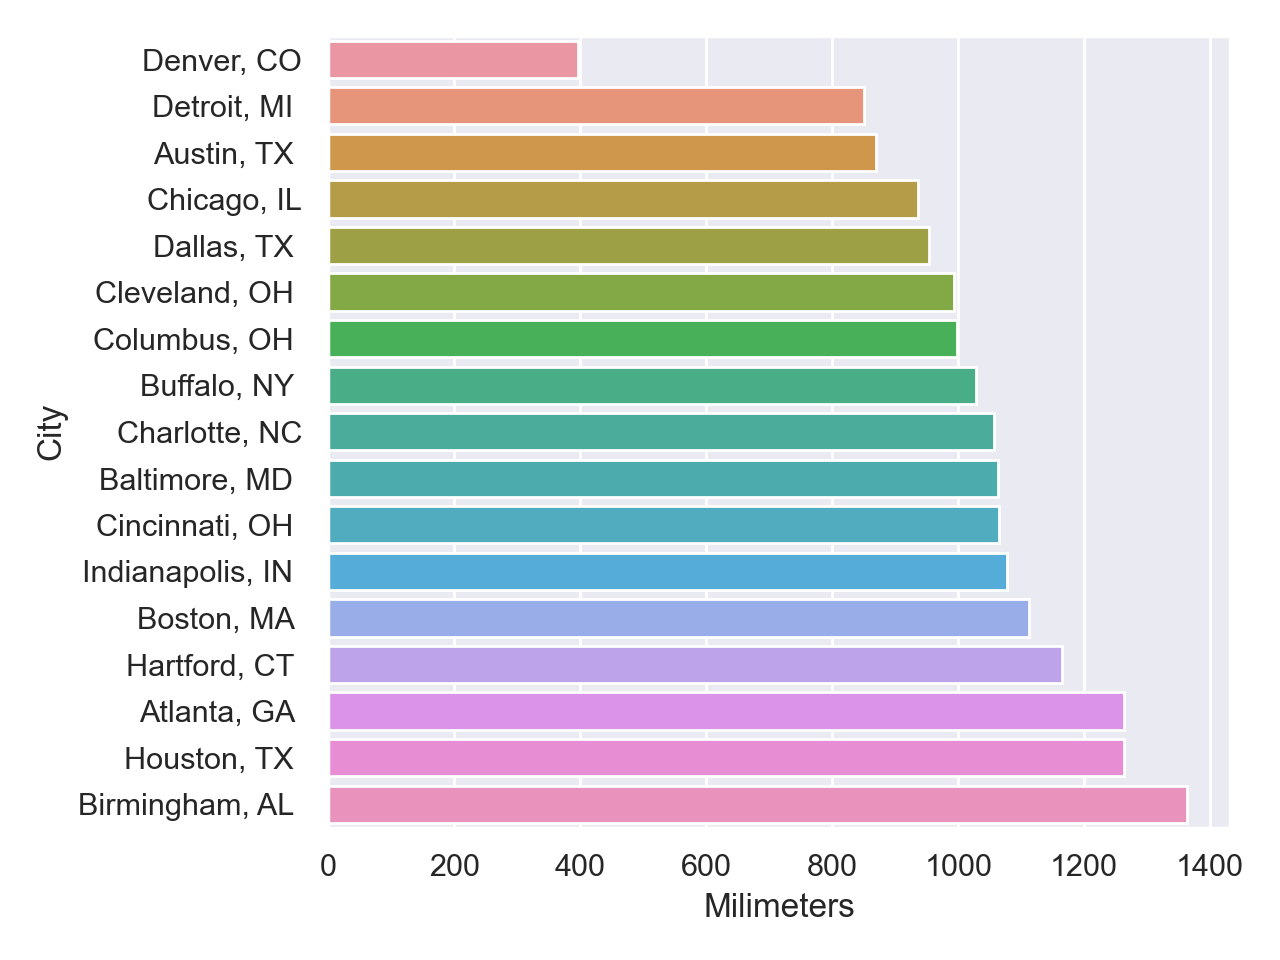

In [56]:
sns.set_style("darkgrid")
ax = sns.barplot(x="Milimeters", y="City", data=rainfallsorted)

Ok, set_style is not going to get me out of pastel rainbow decorative bar colors.

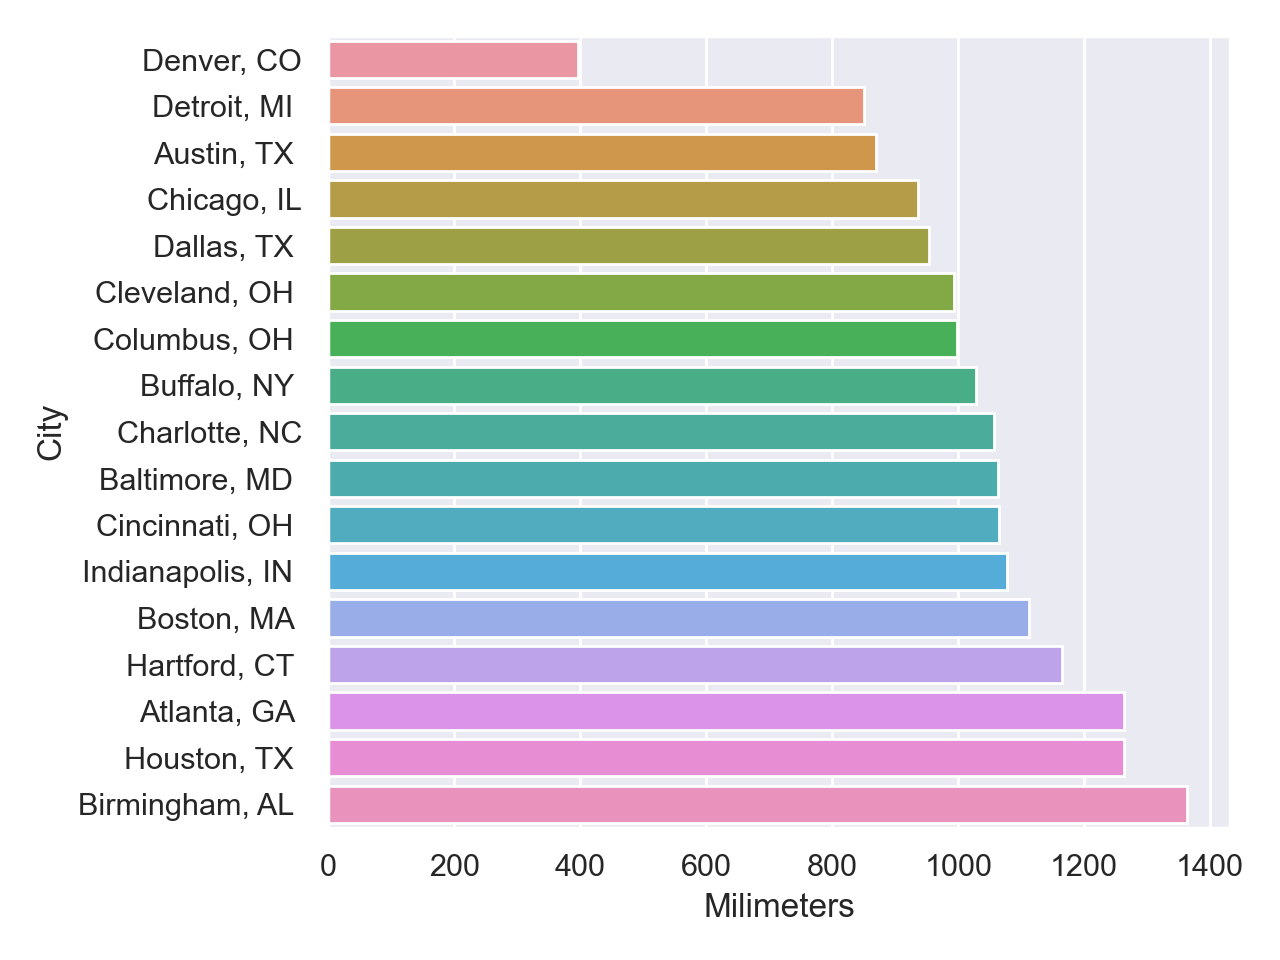

In [57]:
sns.color_palette("rocket")
ax = sns.barplot(x="Milimeters", y="City", data=rainfallsorted)

Text(0.5, 1.0, 'I hear the drizzle of the rain')

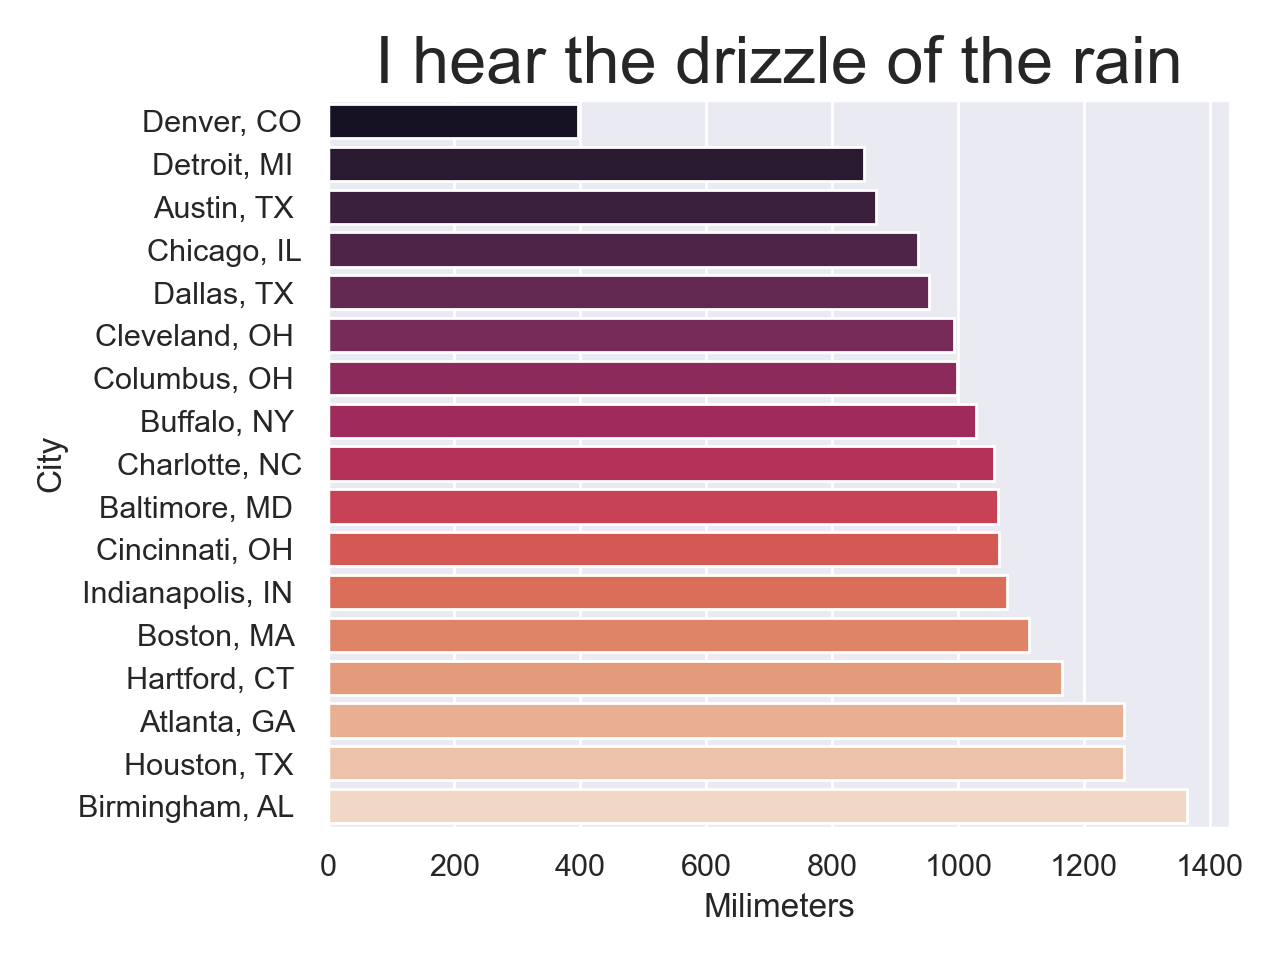

In [58]:
# That didn't do it either.
ax = sns.barplot(x="Milimeters", 
                 y="City", 
                 data=rainfallsorted, 
                 palette="rocket",
              )
plt.title("I hear the drizzle of the rain", fontsize=24)

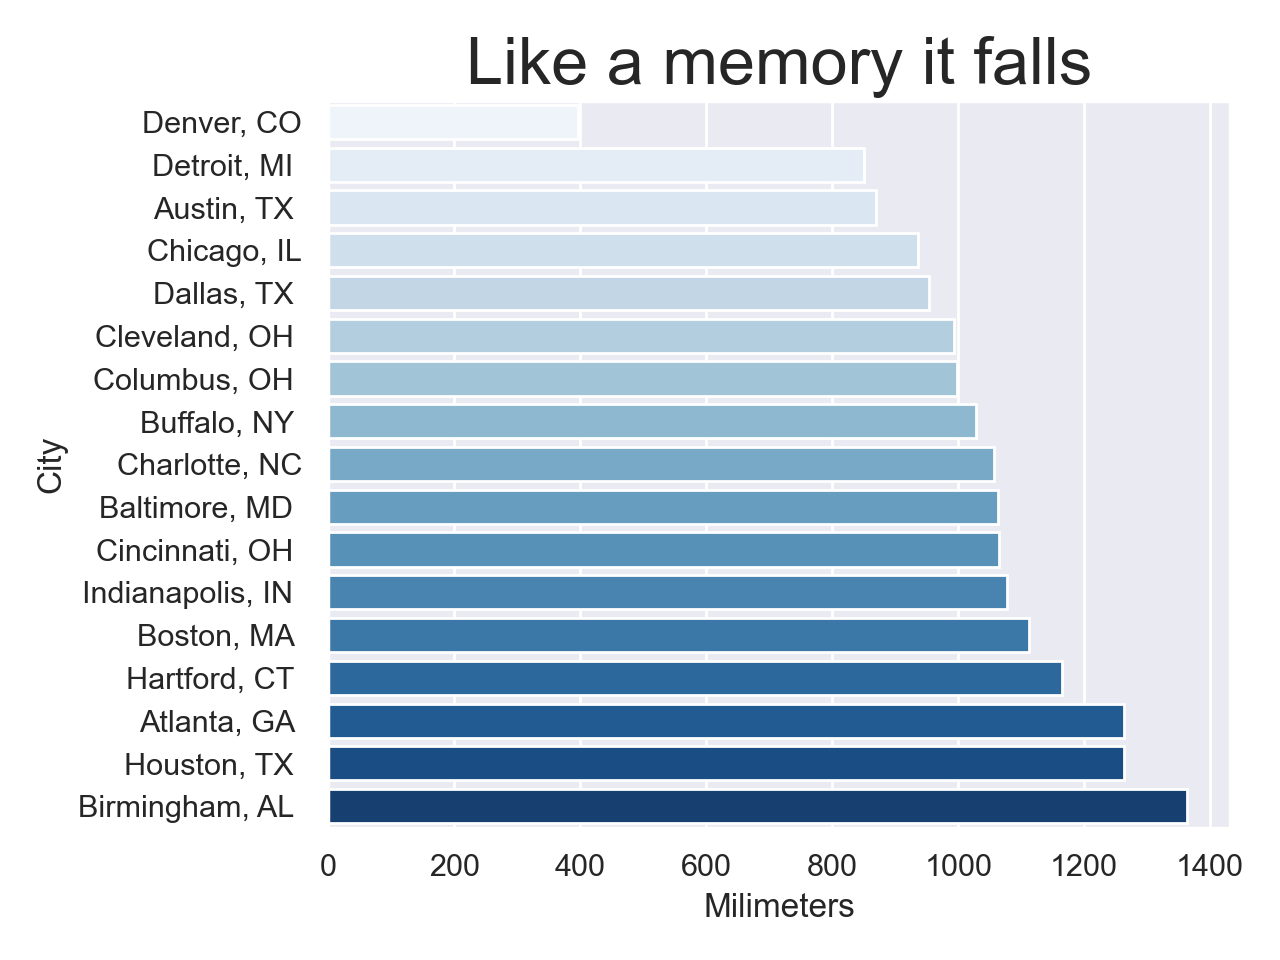

In [59]:
plt.title("Like a memory it falls", fontsize=24)
ax = sns.barplot(x="Milimeters", 
                 y="City", 
                 data=rainfallsorted, 
                 palette="Blues")
